# City Hypothesis Testing

In [1]:
%run src/imports.py

In [2]:
basic_df = pd.read_csv('data/basicinfo.csv')

In [3]:
basic_df.set_index('index',inplace=True)

In [4]:
basic_df

,Austin,Nashville,San Francisco,Boston
index,,,,
ppsf,155.564006,147.460914,9.468968e+02,277.058519
sale_price,312175.500000,290000.000000,1.381250e+06,484248.700000
number_of_rentals,3929.000000,3646.000000,2.097000e+03,902.000000
nightly_price,157.000000,165.000000,2.000000e+02,157.500000


In [5]:
Austin_df = pd.read_pickle('data/Austin/city_listings_combAustin.pkl')

In [6]:
Nashville_df = pd.read_pickle('data/Nashville/city_listings_combNashville.pkl')

In [7]:
SF_df = pd.read_pickle('data/San Francisco/city_listings_combSan Francisco.pkl')

In [8]:
Boston_df = pd.read_pickle('data/Boston/city_listings_combBoston.pkl')

### Adding in Price Per SqFt

In [9]:
Austin_df['price_over_med_ppsf'] = Austin_df['price']/basic_df['Austin'][0]

In [10]:
Nashville_df['price_over_med_ppsf'] = Nashville_df['price']/basic_df['Nashville'][0]

In [11]:
SF_df['price_over_med_ppsf'] = SF_df['price']/basic_df['San Francisco'][0]

In [12]:
Boston_df['price_over_med_ppsf'] = Boston_df['price']/basic_df['Boston'][0]

In [13]:
def bootstrap_sample_medians(data, n_bootstrap_samples=10000):
    bootstrap_sample_medians = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_medians.append(np.median(bootstrap_sample))
    return np.asarray(bootstrap_sample_medians)

In [14]:
Austinmedians = bootstrap_sample_medians(Austin_df['price_over_med_ppsf'])
Nashvillemedians = bootstrap_sample_medians(Nashville_df['price_over_med_ppsf'])
SFmedians = bootstrap_sample_medians(SF_df['price_over_med_ppsf'])
Bostonmedians = bootstrap_sample_medians(Boston_df['price_over_med_ppsf'])

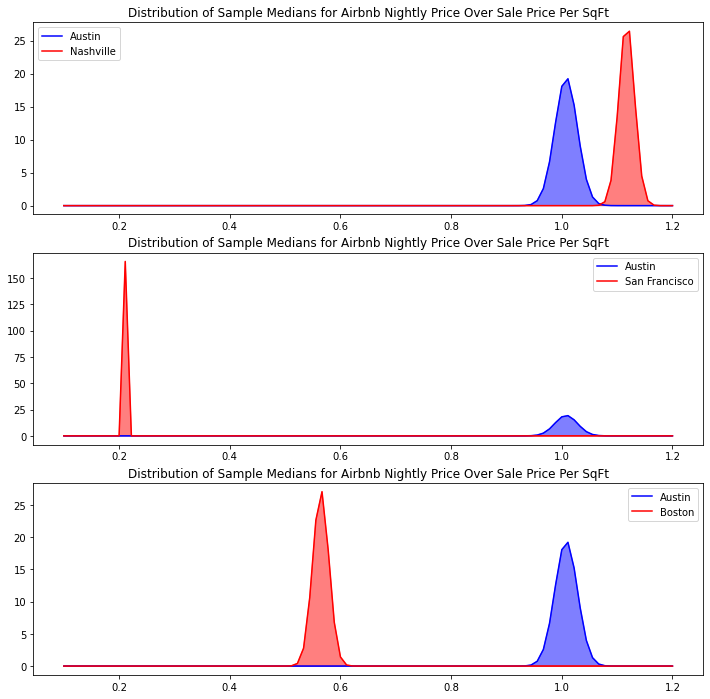

In [15]:
# Creating a plot
fig,ax = plt.subplots(3,1,figsize=(12,12))

# Creating normal distributions for sample means and sample mean standard deviations.
# So these are the sampling distributions for the sample mean.
Austin = stats.norm(Austinmedians.mean(), Austinmedians.std())
Nashville = stats.norm(Nashvillemedians.mean(), Nashvillemedians.std())

# Creating a new array to use for x-axis. 
support = np.linspace(0.1, 1.2, 100)

# call the probability density functions for each of the points on the x axis. 
Austin_pdf = Austin.pdf(support)
Nashville_pdf = Nashville.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax[0].plot(support, Austin_pdf, color='blue', label='Austin')
ax[0].fill(support, Austin_pdf, color='blue', alpha=0.5)
ax[0].plot(support, Nashville_pdf, color='red', label='Nashville')
ax[0].fill(support, Nashville_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax[0].legend()
ax[0].set_title("Distribution of Sample Medians for Airbnb Nightly Price Over Sale Price Per SqFt")






#Austin = stats.norm(Austinmedians.mean(), Austinmedians.std())
SF = stats.norm(SFmedians.mean(), SFmedians.std())

# Creating a new array to use for x-axis. 
support = np.linspace(0.1, 1.2, 100)

# call the probability density functions for each of the points on the x axis. 
#Austin_pdf = Austin.pdf(support)
SF_pdf = SF.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax[1].plot(support, Austin_pdf, color='blue', label='Austin')
ax[1].fill(support, Austin_pdf, color='blue', alpha=0.5)
ax[1].plot(support, SF_pdf, color='red', label='San Francisco')
ax[1].fill(support, SF_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax[1].legend()
ax[1].set_title("Distribution of Sample Medians for Airbnb Nightly Price Over Sale Price Per SqFt")




#Austin = stats.norm(Austinmedians.mean(), Austinmedians.std())
Boston = stats.norm(Bostonmedians.mean(), Bostonmedians.std())

# Creating a new array to use for x-axis. 
support = np.linspace(0.1, 1.2, 100)

# call the probability density functions for each of the points on the x axis. 
#Austin_pdf = Austin.pdf(support)
Boston_pdf = Boston.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax[2].plot(support, Austin_pdf, color='blue', label='Austin')
ax[2].fill(support, Austin_pdf, color='blue', alpha=0.5)
ax[2].plot(support, Boston_pdf, color='red', label='Boston')
ax[2].fill(support, Boston_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax[2].legend()
ax[2].set_title("Distribution of Sample Medians for Airbnb Nightly Price Over Sale Price Per SqFt");

## T-tests

____

----

# EXTRA CODE

In [39]:
# # Creating a plot
# fig,ax = plt.subplots(figsize=(12,4))

# Creating normal distributions for sample means and sample mean standard deviations.
# So these are the sampling distributions for the sample mean.
Austin = stats.norm(Austinmedians.mean(), Austinmedians.std())
SF = stats.norm(SFmedians.mean(), SFmedians.std())

# Creating a new array to use for x-axis. 
support = np.linspace(0.1, 1.2, 100)

# call the probability density functions for each of the points on the x axis. 
Austin_pdf = Austin.pdf(support)
SF_pdf = SF.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax[1].plot(support, Austin_pdf, color='blue', label='Austin')
ax[1].fill(support, Austin_pdf, color='blue', alpha=0.5)
ax[1].plot(support, SF_pdf, color='red', label='San Francisco')
ax[1].fill(support, SF_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax[1].legend()
ax[1].set_title("Distribution of Sample Medians for Airbnb Nightly Price Over Sale Price Per SqFt");

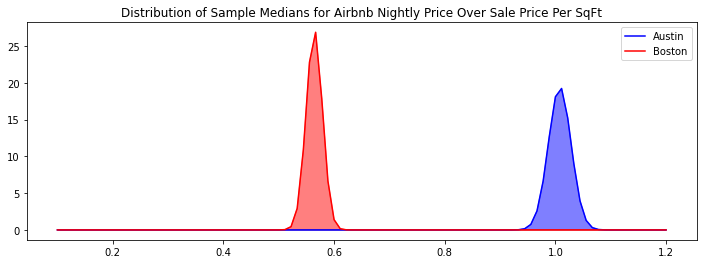

In [37]:
# Creating a plot
fig,ax = plt.subplots(figsize=(12,4))

# Creating normal distributions for sample means and sample mean standard deviations.
# So these are the sampling distributions for the sample mean.
Austin = stats.norm(Austinmedians.mean(), Austinmedians.std())
Boston = stats.norm(Bostonmedians.mean(), Bostonmedians.std())

# Creating a new array to use for x-axis. 
support = np.linspace(0.1, 1.2, 100)

# call the probability density functions for each of the points on the x axis. 
Austin_pdf = Austin.pdf(support)
Boston_pdf = Boston.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax.plot(support, Austin_pdf, color='blue', label='Austin')
ax.fill(support, Austin_pdf, color='blue', alpha=0.5)
ax.plot(support, Boston_pdf, color='red', label='Boston')
ax.fill(support, Boston_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax.legend()
ax.set_title("Distribution of Sample Medians for Airbnb Nightly Price Over Sale Price Per SqFt");